   # Projet Décision et parcours de l'espace



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [104]:
Credit = pd.read_csv ('CarteBancaire.csv')

In [105]:
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. Quelles les prétraitements obligatoires avant d’appliquer l’algorithme Random Forest

* Supprimer les valeurs nulls 
* Normaliser les données
* Séparer le train et le test 
* séparer la classe des données 

In [106]:
#normaliser les variables Amount et Time 
from sklearn.preprocessing import StandardScaler
Credit['nAmount'] = StandardScaler().fit_transform(Credit['Amount'].values.reshape(-1, 1))
Credit['nTime'] = StandardScaler().fit_transform(Credit['Time'].values.reshape(-1, 1))
#supprimer les attributs de base 
Credit = Credit.drop(['Time','Amount'],axis=1)

Text(0, 0.5, 'Fréquence')

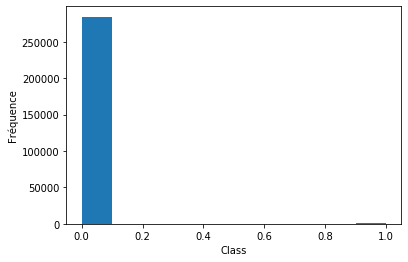

In [107]:
plt.hist(Credit['Class'])
plt.xlabel('Class')
plt.ylabel('Fréquence')


In [108]:

fraud_record = 492

#nparray des indexs  frauduleuse
frauds = np.array(Credit[Credit.Class == 1].index)

#nparray des indexs non frauduleuse
nonfrauds = Credit[Credit.Class == 0].index

#Générez un échantillon aléatoire non uniforme à partir d'une valeurs non frauduleuse de taille de fraud_record sans remplacement:
random_nonfrauds = np.random.choice(nonfrauds, fraud_record, replace = False)

#créer un tableau des randoms non fraud
random_nonfrauds = np.array(random_nonfrauds)

Newsample = np.concatenate([frauds,random_nonfrauds])
CrediUnderSample = Credit.iloc[Newsample,:]

In [109]:
Newsample

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [110]:
#On sépare les données de la classes 
X = CrediUnderSample.ix[:, CrediUnderSample.columns != 'Class']
y = CrediUnderSample.ix[:, CrediUnderSample.columns == 'Class']

In [111]:
#On remarque que les deux classes sont équitables 

Text(0.5, 1.0, 'Aprés échantillionage')

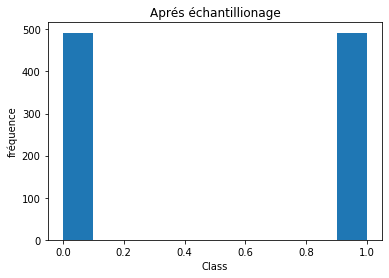

In [112]:
plt.hist(CrediUnderSample['Class'])
plt.xlabel('Class')
plt.ylabel('fréquence')
plt.title('Aprés échantillionage')

# Random forest 

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=101)

In [114]:
rf = RandomForestClassifier(max_depth=8, n_estimators=100, min_samples_leaf=1, max_features=2)

In [115]:
rf.fit(X_train, y_train)

predictRF = rf.predict(X_test)

In [116]:
print(confusion_matrix(y_test,predictRF))


[[146   3]
 [ 19 128]]


In [117]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
accuracy_score(y_test, predictRF)

0.9256756756756757

In [118]:

from sklearn.metrics import mean_squared_error

print('taux d erreur',mean_squared_error(y_test, predictRF))

taux d erreur 0.07432432432432433


# 2 recherche de meilleurs paramétre avec grid search


In [119]:
from sklearn.model_selection import GridSearchCV


n_estimators = (10,100,10)
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
model = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   20.8s finished


## afficher les meilleurs paramétre

In [120]:
print("best max_depth", model.best_estimator_.get_params()['max_depth'])
print("best n_estimators", model.best_estimator_.get_params()['n_estimators'])
print("best min_samples_leaf", model.best_estimator_.get_params()['min_samples_leaf'])
print("max_features", model.best_estimator_.get_params()['min_samples_split'])

best max_depth 25
best n_estimators 10
best min_samples_leaf 5
max_features 5


In [121]:
predictGS = model.predict(X_test)

In [122]:
res=pd.DataFrame(model.cv_results_)
max(res['mean_test_score'])

0.9491234731978989

In [123]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, 
                                                    test_size=0.30, random_state=101)

In [124]:
model = RandomForestClassifier(max_depth=8, n_estimators=10, min_samples_leaf=1, max_features=5)

In [125]:
model.fit(X_trains, y_trains)

predicted = model.predict(X_tests)

In [126]:
print(confusion_matrix(y_tests,predicted))

[[142   7]
 [ 17 130]]


In [127]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
accuracy_score(y_tests, predicted)

0.918918918918919

# 3. Quel est le taux d'erreur de votre modèle random forest ?

In [87]:
from sklearn.metrics import mean_squared_error
RFerreur = mean_squared_error(y_test, predictGS)
print('taux d erreur',RFerreur)

taux d erreur 0.08108108108108109


# 4. Quel est le meilleur classifieur (ou estimator) de votre random forest ?

estimateur 1 accuracy 0.8716216216216216
estimateur 2 accuracy 0.902027027027027
estimateur 3 accuracy 0.9087837837837838
estimateur 4 accuracy 0.9222972972972973
estimateur 5 accuracy 0.9256756756756757
estimateur 6 accuracy 0.9222972972972973
estimateur 7 accuracy 0.9121621621621622
estimateur 8 accuracy 0.9121621621621622
estimateur 9 accuracy 0.9324324324324325
estimateur 10 accuracy 0.9256756756756757


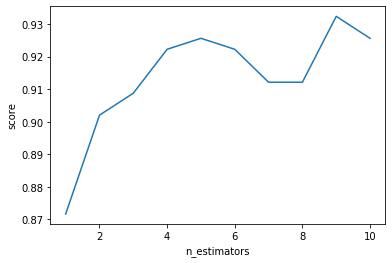

estimateur 1 min score 0.8716216216216216


In [57]:
import warnings
warnings.filterwarnings('ignore')
N = 10
accuracy = []


for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1))
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print('estimateur',(i+1),'accuracy', accuracy[i])

plt.plot([(i+1) for i in range(10)], accuracy)
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.show()

minerror=min(accuracy)
indexmin=accuracy.index(minerror)+1
print('estimateur' ,indexmin ,'min score' ,minerror)

maxerror=max(accuracy)
indexmax=accuracy.index(maxerror)+1
print('Le meilleur estimateur :' ,indexmax,'avec un score',maxerror)


### meilleur classifieur

In [61]:
maxerror=max(accuracy)
indexmax=accuracy.index(maxerror)+1
print('Le meilleur estimateur :' ,indexmax,'avec un score',maxerror)


Le meilleur estimateur : 9 avec un score 0.9324324324324325


# 5. Affichez le taux d’erreur de tous les estimator de votre modèle Random Forest 

1 0.34447674418604646
2 0.24854651162790697
3 0.21220930232558144
4 0.1656976744186046
5 0.12063953488372092
6 0.09447674418604646
7 0.09156976744186052
8 0.09447674418604646
9 0.07703488372093026
10 0.08430232558139539


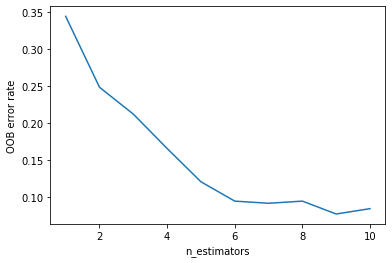

estimateur 9 min erreur 0.07703488372093026
estimateur 1 max erreur 0.34447674418604646


In [59]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
N = 10
error = []


for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1), oob_score=True)
    clf.fit(X_train, y_train)
    predictRF = rf.predict(X_test)
    oob_error = 1 - clf.oob_score_
    error.append((oob_error))
    print((i+1), error[i])
  

    
plt.plot([(i+1) for i in range(10)], error)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()
    
    
    
minerror=min(error)
indexmin=error.index(minerror)+1
print('estimateur' ,indexmin ,'min erreur' ,minerror)


maxerror=max(error)
indexmax=error.index(maxerror)+1
print('estimateur' ,indexmax,'max erreur',maxerror)
    



# 6. Prenez deux estimators de votre modèle Random Forest, l'estimator le plus performant et l'estimator le moins performant :

In [128]:
minerror=min(accuracy)
indexmin=accuracy.index(minerror)+1
print('estimateur le moins performants' ,indexmin ,'min score' ,minerror)

maxerror=max(accuracy)
indexmax=accuracy.index(maxerror)+1
print('Le meilleur estimateur :' ,indexmax,'avec un score',maxerror)
    

estimateur le moins performants 1 min score 0.8716216216216216
Le meilleur estimateur : 9 avec un score 0.9324324324324325


##  Quels le taux d'erreur des deux estimatiors ?

In [131]:
minerror=min(error)
indexmin=error.index(minerror)+1
print('estimateur' ,indexmin ,'taux erreur' ,minerror)


maxerror=max(error)
indexmax=error.index(maxerror)+1
print('estimateur' ,indexmax,'taux erreur',maxerror)
    

estimateur 9 taux erreur 0.07703488372093026
estimateur 1 taux erreur 0.34447674418604646


# 7. Quelle est la différence entre la moyenne des taux d'erreur des deux estimators et le taux d'erreur de votre meilleur modèle random Forest ?

In [90]:
erreurmoyen=((maxerror-minerror)/2)-RFerreur

In [92]:
print('Taux d erreur moyen', erreurmoyen)

Taux d erreur moyen 0.052639849151477014


# 8. Affichez les deux arbres correspondants au deux estimators 

In [93]:
feature_list = list(X.columns)
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot


## Estimateur le plus performant

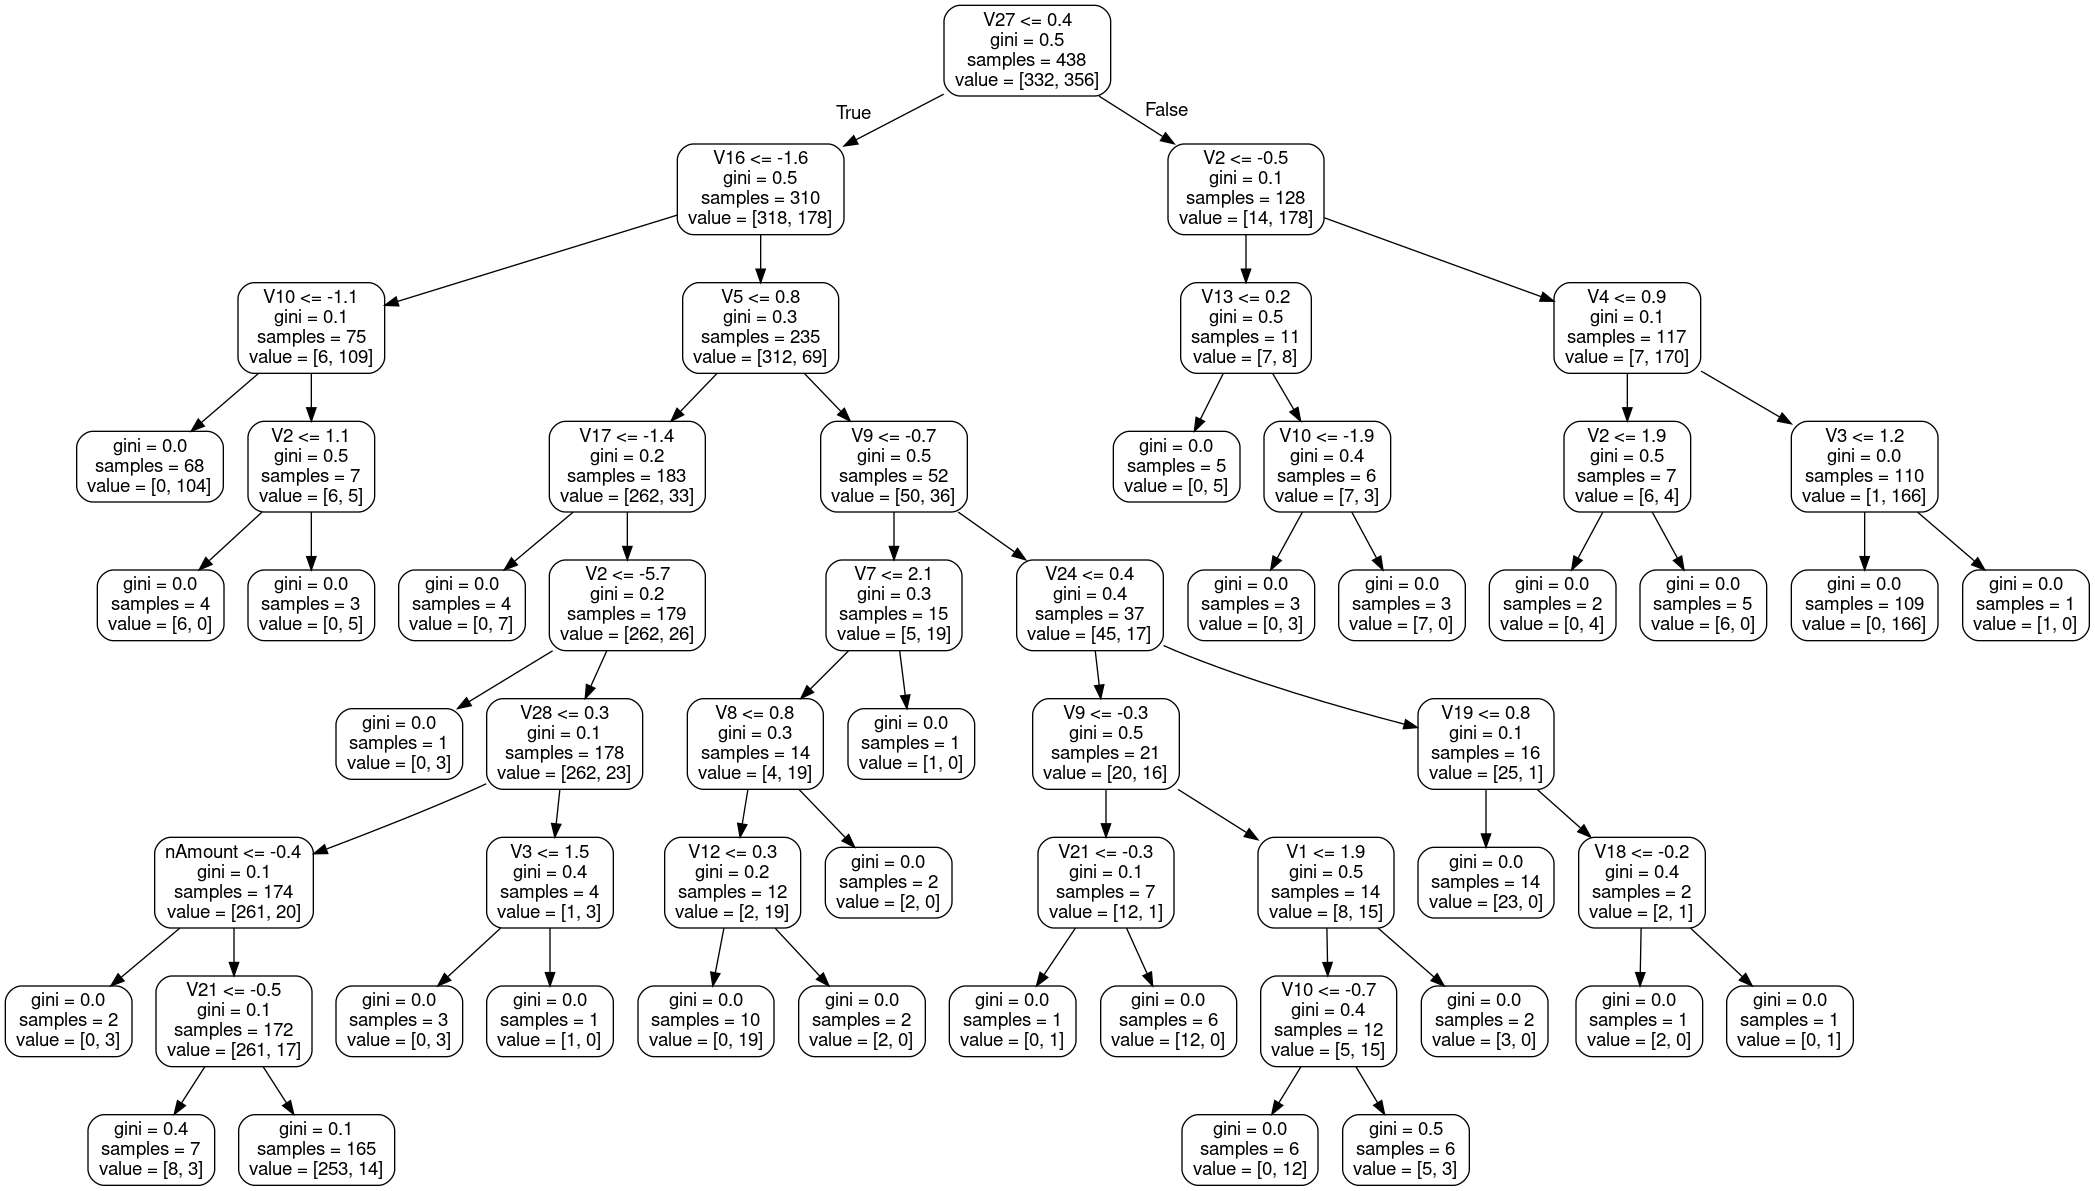

In [95]:
tree = rf.estimators_[9]

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file

Image(graph.create_png())

## Estimateur moins performant 

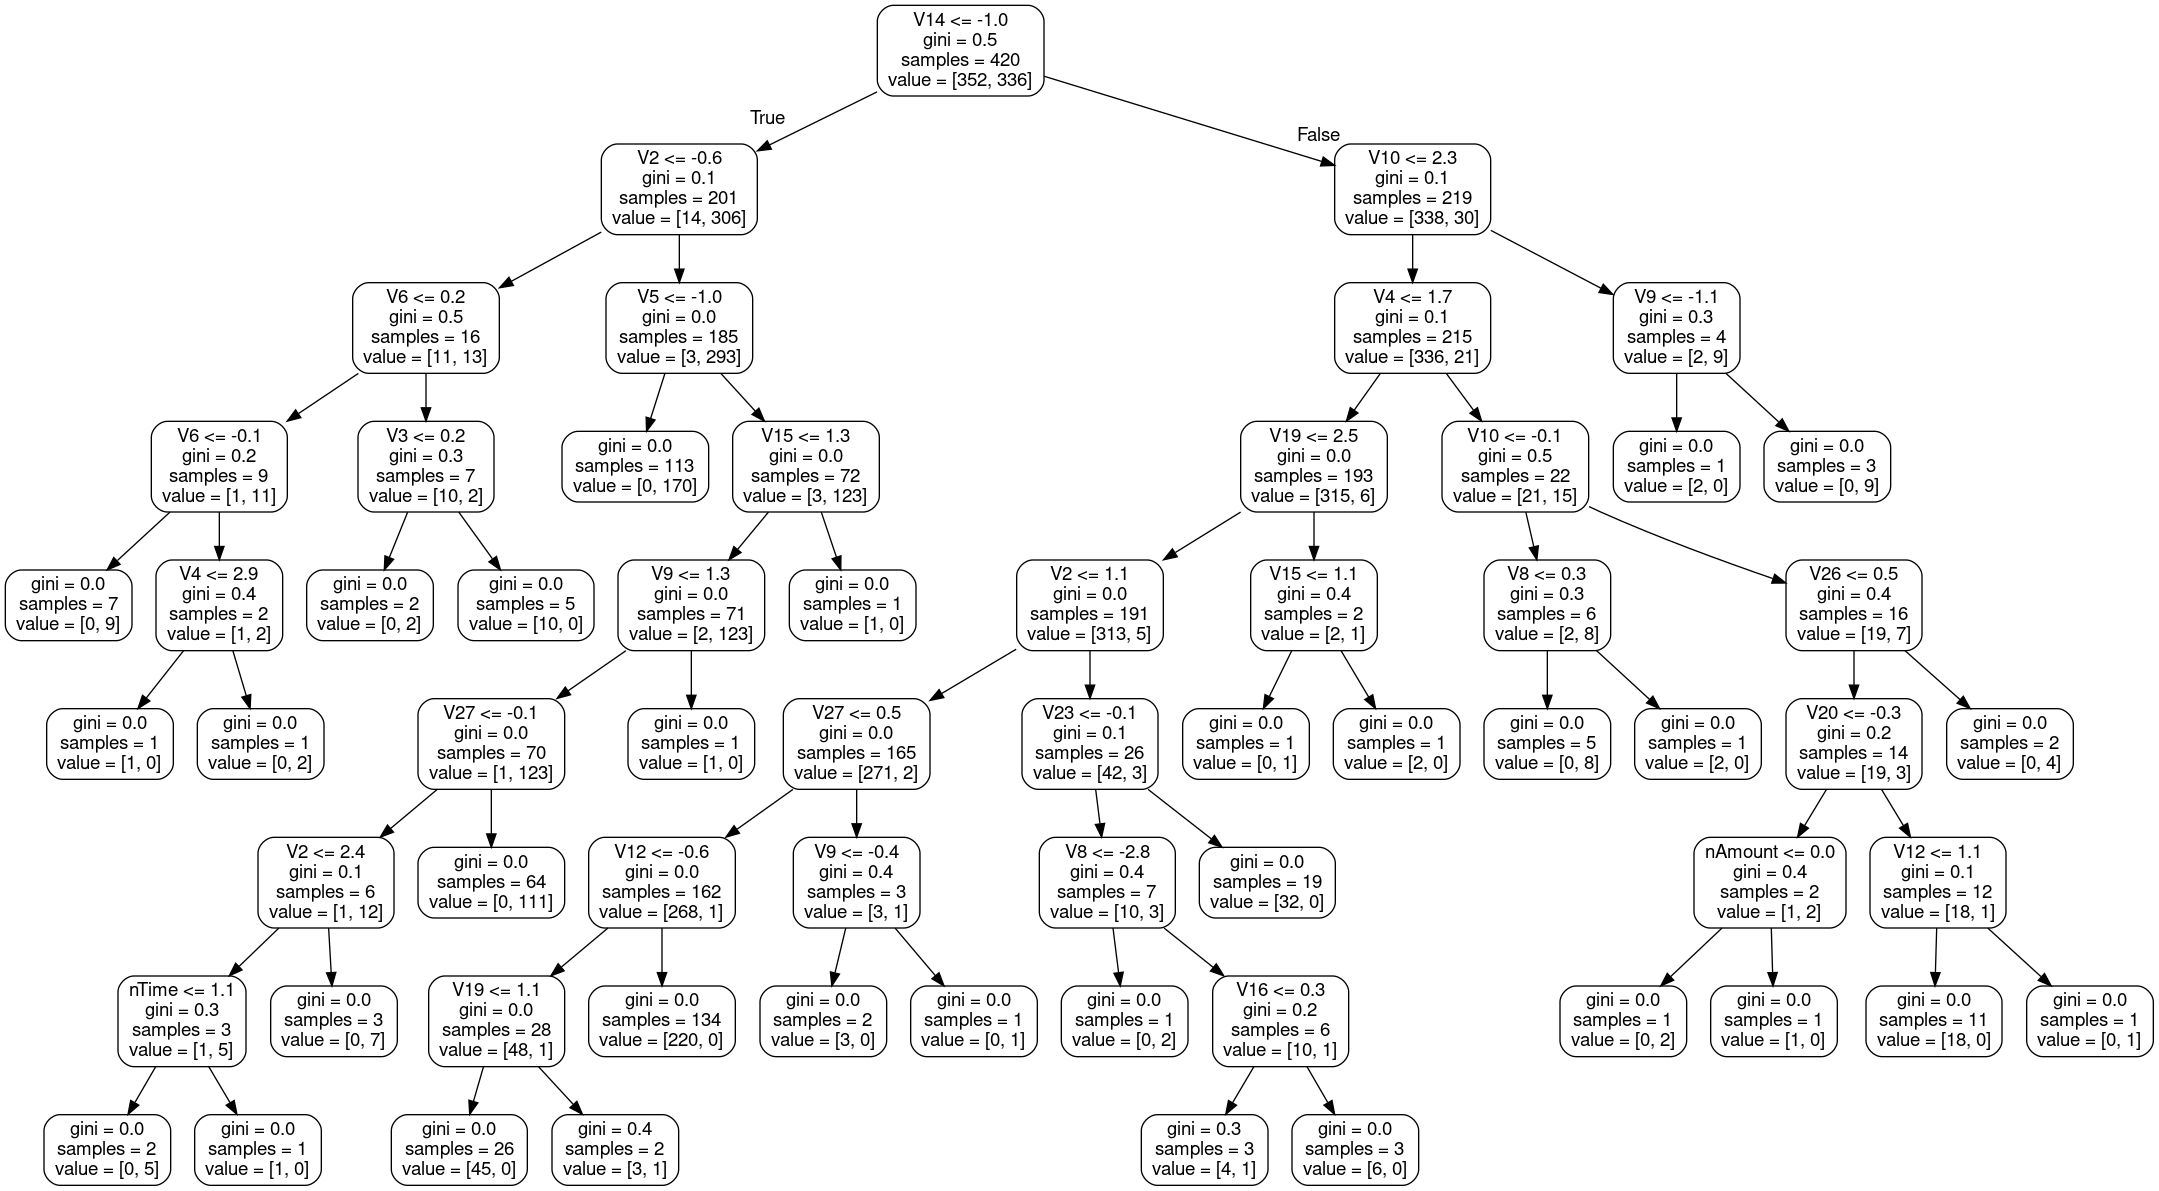

In [94]:
tree = rf.estimators_[1]

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file

Image(graph.create_png())